# Computational Economics  (ECO288)

## Tutorial: Epidemiology Models


H.W. Heathcote: epidemiologic models are *deterministic models for infectious diseases which are spread by direct person-to-person contact in a population*.

This kind of models has been used since by a few decades by economist, for matters that have nothing to do with health.

- diffusion of information, or opinions on social medias
- asset prices and fads
- expectation formation for macroeconomic outcomes (ex: *The Epidemiology of Macroeconomic Expectations* by Chris Carroll)

Epidemiologic models have two features that depart from standard economic models:

- Agent's behaviour does not take the full system into account, an is irrational in the sense that it isn't forwards looking. Instead, an agent is given a behavioural heuristic.
- The transitions of the whole system can be determined without solving for complex interactions first.

Understanding why these two assumptions are very costly for economists will keep us busy during a big part of the course. Here we just consider two simple models as small programming exercises.

### Simple SIR model

There is a continuum of agents of mass $1$. Each agent can be either "Susceptible" (S), "Infected" (I) or "Recovered" (R).
In each period, one agent meets another agent drawn randomly.
During a meeting Susceptible agents who meet an infected agent, will always catch the disease (or the fad) but are not contagious. Infected agents, have a probability $\pi$ of being recovered. Nothing happens to Recovered agents who meet other people. No distinction is made between recovering as a healthy or a dead person.

We're interested in the evolution in the number infected persons, both the speed of infection and the total amount of infected people in every period.

__Write down the transition equations for $n_I$, the number of infected people, for $n_R$ the number of recovered people and $n_S$ the number of susceptible people.__



$n_{R,t} =  n_{R,t-1} + n_{I,t-1}*\pi$

$n_{I,t} = n_{I,t-1} \underbrace{- n_{I,t-1}*\pi}_{\text{those who have recovered}} + \underbrace{ {n_{S,t-1} \frac{  n_{I,t-1} } {1}}}_{\text{those who are just infected}} $

$n_{S,t} = n_{S,t-1} - n_{S,t-1}   \frac{  n_{I,t-1} } {1} - \underbrace{ {n_{S,t-1} \frac{  n_{I,t-1} } {1}}}_{\text{those who are just infected}}$

(recall that $ 1= n_I+n_S+n_R$)

__Compute the transition function `f` for the vector state $s_t$ returning $s_{t+1}$__



In [1]:
Π = 0.10

0.1

In [2]:
function f(s)
    n_S, n_I, n_R = s
    new_recovered = n_I*Π
    new_infected = n_S*n_I
    nn_R = n_R + new_recovered
    nn_S = n_S - new_infected
    nn_I = n_I + new_infected - new_recovered
    # nn_R + nn_S + nn_I sums to  n_R + n_S + n_I = 1
    return [nn_S, nn_I, nn_R]
end

f (generic function with 1 method)

In [3]:
f([0.3, 0.4, 0.3])

3-element Array{Float64,1}:
 0.18
 0.48
 0.33999999999999997

__Compute the transitions over $T$ periods. Plot the result using Plots.jl. (bonus: check against closed form solution)__



In [4]:
T = 100
v0 = [0.9, 0.1, 0.0]
sim  = Vector{Float64}[]
for t=1:T
    push!(sim, v0)
    v1 = f(v0)
    v0 = v1
end

In [5]:
using Plots

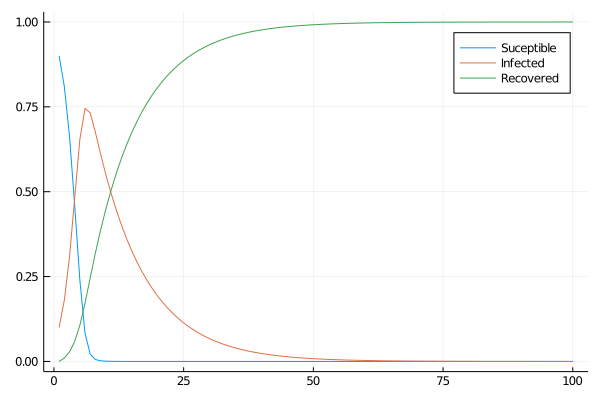

In [6]:
pl = plot(x=1:T, [el[1] for el in sim], label="Suceptible" )
plot!(pl, x=1:T, [el[2] for el in sim], label="Infected" )
plot!(pl, x=1:T, [el[3] for el in sim], label="Recovered" )

__We now assume a Susceptible person who meets an infected one has a probability $\mu$ of catching the disease. Update the transition function. Update function $f$ and write a function of $\mu$, $\pi$ which returns the simulation. Compare different values of the parameters. How would you interpret "social distancing"? How would you choose parameters $\Pi$ and $\mu$__ 

Here we essentially refactor our former experiments. The updated equations are:

$$n_{R,t}  =  n_{R,t-1} + n_{I,t-1}*\pi$$
$$n_{I,t}  =  n_{I,t-1} \underbrace{- n_{I,t-1}*\pi}_{\text{those who have recovered}} + \underbrace{ {n_{S,t-1} \frac{  n_{I,t-1} } {1}}}_{\text{those who are just infected}}$$

$$n_{S,t} =  n_{S,t-1} - n_{S,t-1}   \frac{  n_{I,t-1} } {1} + \underbrace{ {n_{S,t-1} \frac{  n_{I,t-1} } {1}}}_{\text{those who are just infected}}$$




In [7]:
function f(s; μ=1.0, Π=0.1)
    # note: there exist several types of arguments:
    # - positional : s
    # - positional and optional (with default value): not existent
    # - keyword arguments with default values after the semi-colon: μ and Π 
    n_S, n_I, n_R = s
    new_recovered = n_I*Π
    new_infected = n_S*n_I*μ
    nn_R = n_R + new_recovered
    nn_S = n_S - new_infected
    nn_I = n_I + new_infected - new_recovered
    # nn_R + nn_S + nn_I sums to  n_R + n_S + n_I = 1
    return [nn_S, nn_I, nn_R]
end
function simulate(;v0=[1.0,0.0,0.0], T=100, μ=1.0, Π=0.1)
    T = 100
    v0 = [0.9, 0.1, 0.0]
    sim  = Vector{Float64}[]
    for t=1:T
        push!(sim, v0)
        v1 = f(v0; μ=μ, Π=Π)
        v0 = v1
    end
    return hcat(sim...)
end

simulate (generic function with 1 method)

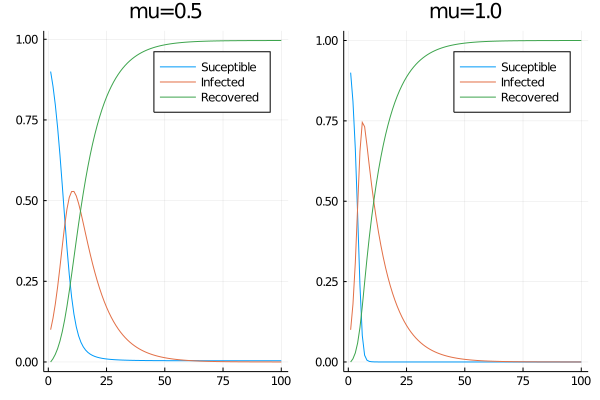

In [8]:
sim1 = simulate(μ=0.5)
pl1 = plot(x=1:T, sim1[1,:], label="Suceptible", title="mu=0.5" )
plot!(pl1, x=1:T, sim1[2,:], label="Infected" )
plot!(pl1, x=1:T, sim1[3,:], label="Recovered" )
sim2 = simulate(μ=1.0)
pl2 = plot(x=1:T, sim2[1,:], label="Suceptible", title="mu=1.0" )
plot!(pl2, x=1:T, sim2[2,:], label="Infected" )
plot!(pl2, x=1:T, sim2[3,:], label="Recovered" )
plot(pl1,pl2)

### A Spatial SIR model

We now consider another version of the model where agents evolve in the space $\mathcal{S}=[0,1]\times[0,1]$. There are $N\in\mathbb{N}$ agent. At any date, each agent $n \in [0,1]$  is located at $(x_n,y_n)\in \mathcal{S}$.

Each agent moves follows a random walk bounded by $\mathcal{S}$:
$$x_t = \min(\max( x_{t-1} + \epsilon_t, 0), 1)$$
$$y_t = \min(\max( y_{t-1} + \eta_t, 0), 1)$$
where $\epsilon_t$ and $\eta_t$ are both normally distributed with standard deviation $\sigma$.

At any date, the individual state of an agent is $s_t=(x_t, y_t, h_t)$ where $h_t$ is either "S", "I" or "R". $v_t$ denotes the states of all agents (for instance $v_t=(s_{n,t})_n$. The health status of each agent is updated in the following way:

- Agents $R$ stay $R$.
- Agents $I$ have probability $\pi$ to become $R$. They stay $I$ otherwise.
- An agent of type $S$ in position $(x,y)$ has a probability $prob(x,y,S)$ to be infected that is $\mu$ if there is another infected agent within a radius $r>0$.


__Define a type `Agent`, which holds the type of an agent. The state of the whole system will be held in a `Vector[Agent]` type.__



In [9]:
struct Agent
    x::Float64
    y::Float64
    h::Int64    # 0 if susceptible, 1 if infected, 2 if recovered

end

In [11]:
Agent(0.32, 0.1, 0)

Agent(0.32, 0.1, 0)

In [12]:
# optional: we define a default constructor so that initial position is random by default.
Agent() = Agent(rand(), rand(), 0)

Agent

In [13]:
Agent()

Agent(0.702432447179566, 0.5656276777963649, 0)

In [15]:
susceptible(agent::Agent) = (agent.h==0)
infected(agent::Agent) = (agent.h==1)
recovered(agent::Agent) = (agent.h==2)

recovered (generic function with 1 method)

In [16]:
infected(Agent())

false

__Write a function `spatial_transition(S::Vector{Agent})::Vector{Agent}` to compute the transition of the positions. Write another function `random_guess(T=100)` which simulates for $T$ periods in order to find a good initial guess.__



In [17]:
infected(s::String) = (s=="bad")

infected (generic function with 2 methods)

We need to be able to draw numbers form a gaussian distribution. The base library contains the `randn` function for that (function `rand` draws uniformly from [0,1])).
The function we use to compute the maximum (resp minimum) of two numbers is called `max` (resp `min`)

We'll write first the function to compute the movement of one agent.


In [24]:
function spatial_transition(s::Agent; σ=0.1)
    x = s.x + randn()*σ :: Float64 # type annotations are not mandatory
    y = s.y + randn()*σ :: Float64 # they can be used to document the code or to implement a type check
    x = max(min(x, 1.0), 0.0)
    y = max(min(y, 1.0), 0.0)
    return Agent(x,y,s.h)
end

spatial_transition (generic function with 1 method)

In [26]:
# let's try
a = Agent()
a1 = spatial_transition(a)
(a, a1)

(Agent(0.21269619880712431, 0.8648790602376142, 0), Agent(0.32010033955031675, 0.9332254635264455, 0))

In [27]:
population = [Agent() for i=1:5]

5-element Array{Agent,1}:
 Agent(0.11338733767838627, 0.37613623496689286, 0)
 Agent(0.5455487727510901, 0.43915068639920496, 0)
 Agent(0.05683055083830024, 0.8492659752068172, 0)
 Agent(0.3364517741160784, 0.8803995376779348, 0)
 Agent(0.0564170642939652, 0.09541893803302437, 0)

The function spatial_transition has been defined for one single agent
we could define `spatial_transition(agents::Vector{Agent})=[spatial_transition(agent) for agent in agents]`
but we can also directly use the vectorization syntax `.`. (take a mental note of how beautiful that is)

In [28]:
spatial_transition.(population)

5-element Array{Agent,1}:
 Agent(0.056100066246777255, 0.25197906301905415, 0)
 Agent(0.429497714973482, 0.31827115282000956, 0)
 Agent(0.010850004484856991, 0.8971383222597487, 0)
 Agent(0.5142947748803929, 0.8446304798478452, 0)
 Agent(0.1333939791114942, 0.007962699738811127, 0)

__Write a function `show_population` to plot all agents with different colors for different health status.__



In [29]:
using Plots

In [31]:
function show_population(agents::Vector{Agent})
    pl = plot(xlim=(0,1), ylim=(0,1))
    x = [agent.x for agent in agents if susceptible(agent)]
    y = [agent.y for agent in agents if susceptible(agent)]
    scatter!(pl, x, y, color="blue", label="Susceptible")
    x = [agent.x for agent in agents if infected(agent)]
    y = [agent.y for agent in agents if infected(agent)]
    scatter!(pl, x, y, color="red", label="Infected")
    x = [agent.x for agent in agents if recovered(agent)]
    y = [agent.y for agent in agents if recovered(agent)]
    scatter!(pl, x, y, color="green", label="Recovered")
end

show_population (generic function with 1 method)

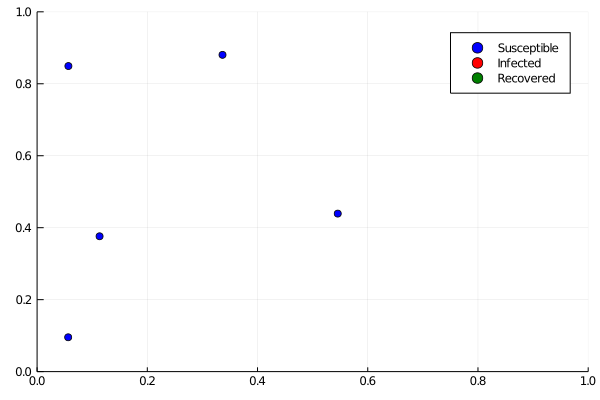

In [32]:
show_population(population)

__Write a function `evolve(S::Vector[Agent])::Vector[Agent]` which takes the population in a given state and returns the same population with updated health status.__



In [34]:
function prob(agent::Agent, agents::Vector{Agent}; μ=1.0, r=0.1)
    # count number of agents within r radius
    c = -1
    for agent2 in agents
            d = sqrt( sqrt((agent.x-agent2.x)^2 + (agent.y-agent2.y)^2) )
            if d<r
                c += 1
            end
        
    end
    if c>0
        return μ
    else
        return 0.0
    end
    
end

prob (generic function with 1 method)

In [55]:
function evolve(agents::Vector{Agent}; Π=0.1, )
    new_agents = Agent[]
    for agent in agents
        if recovered(agent)
            # nothing to do
            push!(new_agents, agent)
        elseif infected(agent)
            # with probability Π this agent recovers
            # let's draw a uniform distribution between 0 and 1
            # and compare it with Π
            if rand()<Π
               push!(new_agents, Agent(agent.x, agent.y, 2))
            else
                push!(new_agents, agent)
            end
        elseif susceptible(agent)
            # compute the probability of being infected
            p = prob(agent, agents)
            if rand()<p
                push!(new_agents, Agent(agent.x, agent.y, 1))
            else
                push!(new_agents, agent)
            end
        end
    end
    return new_agents
end


evolve (generic function with 1 method)

In [56]:
infect(agent::Agent) = Agent(agent.x, agent.y, 1)

infect (generic function with 1 method)

__Write a function `simulate(S0::Vector[Agent], k=1)` to simulate the economy starting from an initially random position with `k` infected individuals. The returned object should be of type `Vector[Vector[Agent]]`.__



In [57]:
N = 50
population_0 = [Agent() for i=1:N]
population_0[1] = infect(population_0[1])

Agent(0.39306362581374765, 0.29717439895498776, 1)

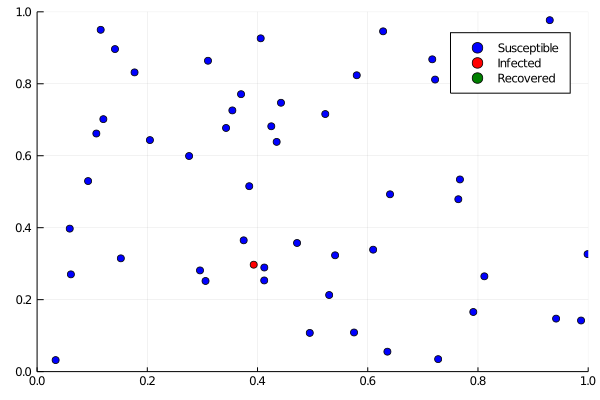

In [58]:
show_population(population_0)

In [59]:
function simulate(population_0; T=100)
    simulation = []
    push!(simulation, population_0)
    for t=1:T
        pop = simulation[end]
        pop = spatial_transition.(pop)
        pop = evolve(pop)
        push!(simulation, pop)
        
    end
    return simulation
    
end

simulate (generic function with 2 methods)

In [60]:
sims = simulate(population_0);

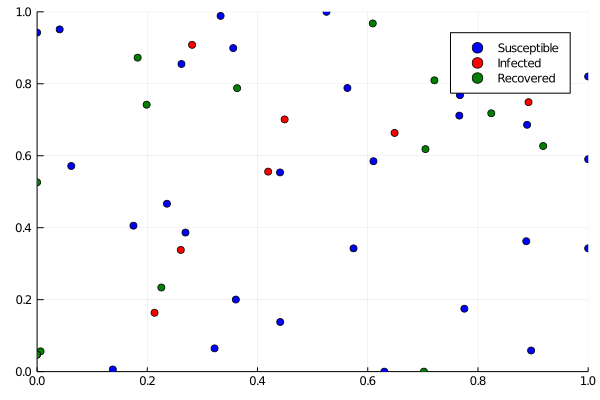

In [61]:
show_population(sims[30])

__Compute statistics along a simulated path for $n_I$, $n_S$, $n_R$. Plot and compare with the basic SIR model__

In [63]:
n_S_vec = [length([ag for ag in pop if susceptible(ag)]) for pop in sims] / length(sims);
n_I_vec = [length([ag for ag in pop if infected(ag)]) for pop in sims] / length(sims);
n_R_vec = [length([ag for ag in pop if recovered(ag)]) for pop in sims] / length(sims);

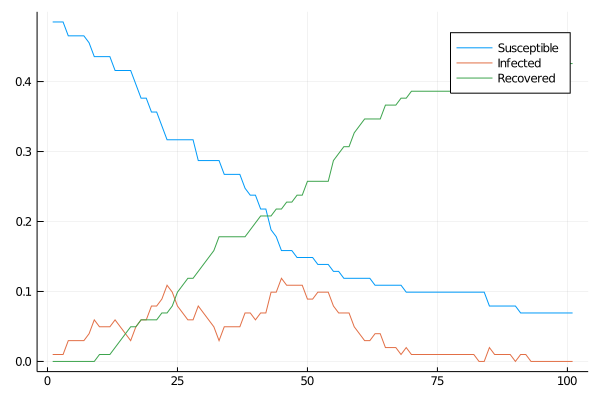

In [64]:
pl = plot()
plot!(pl, n_S_vec, label="Susceptible")
plot!(pl, n_I_vec, label="Infected")
plot!(pl, n_R_vec, label="Recovered")

### Additional questions

Have fun by trying to answer one of these questions:
- change probability of infection so that it depends on the number of infected people in the vincinity (with some suitable functional formulation for)
- compute an animation of the transition
- compute an interactive visualisation (with `Interact.jl` if available)

In [65]:
anim = @animate for i ∈ 1:length(sims)
    show_population(sims[i])
end

Animation("/tmp/jl_olk809", ["000001.png", "000002.png", "000003.png", "000004.png", "000005.png", "000006.png", "000007.png", "000008.png", "000009.png", "000010.png"  …  "000092.png", "000093.png", "000094.png", "000095.png", "000096.png", "000097.png", "000098.png", "000099.png", "000100.png", "000101.png"])

┌ Info: Saved animation to 
│   fn = /home/pablo/Mobilhome/teaching/eco309_class/notebooks/tmp.gif
└ @ Plots /home/pablo/.julia/packages/Plots/XJg0n/src/animation.jl:102


Plots.AnimatedGif("/home/pablo/Mobilhome/teaching/eco309_class/notebooks/tmp.gif")
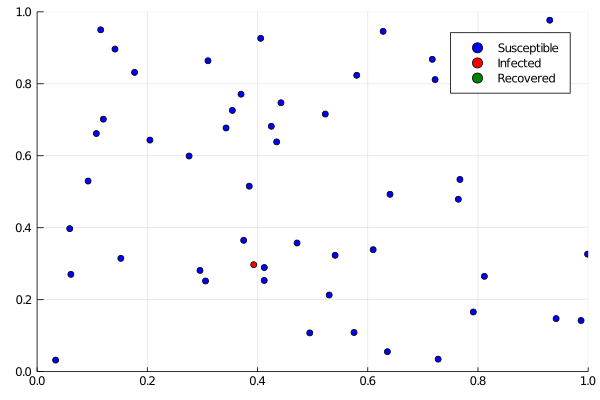

In [66]:
gif(anim, fps=2)

In [67]:
function fun(s,x)
    println("Hi")
end

fun (generic function with 2 methods)

In [36]:
function fun(s,x,z)
end

fun (generic function with 2 methods)

In [68]:
@time fun(0,4)

Hi
  0.000082 seconds (31 allocations: 640 bytes)


In [40]:
fun(0,4,4)

In [49]:
function fan(s,x,z=true)
    if z
    
    else
        println("hi")
    end
end

fan (generic function with 2 methods)

In [50]:
fan(0, 1)

In [51]:
fan(0, 1, false)

hi


In [52]:
function fon(s,x; arg1="Ji", arg2=4)
    println(arg1)
    println(arg2)
end

fon (generic function with 1 method)

In [54]:
fon(0,2; arg2=9, arg1="hello")

hello
9
